In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

# Hypothesis

The wine description/review length has a positive correlation with the review score.

# Setup data

Read in data and replace unknown values with NA

In [2]:
wine_data_path = "../data/winemag-data-130k-v2.csv" 

missing_values = ["n/a", "na", "--", "false"]
raw_wine_data = pd.read_csv(wine_data_path, na_values = missing_values)

Select columns relevant for our hypothesis and remove the values with NA

In [3]:
filtered_wine_data = raw_wine_data[['description', 'points']]
clean_wine_data = filtered_wine_data.dropna()

Add a new column with the length of the description

In [4]:
clean_wine_data['description_length'] = clean_wine_data['description'].apply(lambda x: len(str(x).split(" ")))

Remove the rows that don't have a good review(description that specifiies where the wine is made)

In [5]:
clean_wine_data = clean_wine_data.loc[clean_wine_data['description_length'] > 6]

# Correlation

Correlation between points and the description length seems to be a small positive correlation.

In [6]:
clean_wine_data.corr()

,points,description_length
points,1.000000,0.517249
description_length,0.517249,1.000000


# Points versus grouped description length

Group the panda dataframe by description length and calculate mean and standard deviation of every group.

In [7]:
length_means = clean_wine_data['points'].groupby(clean_wine_data['description_length']).mean()
length_stds = clean_wine_data['points'].groupby(clean_wine_data['description_length']).std()

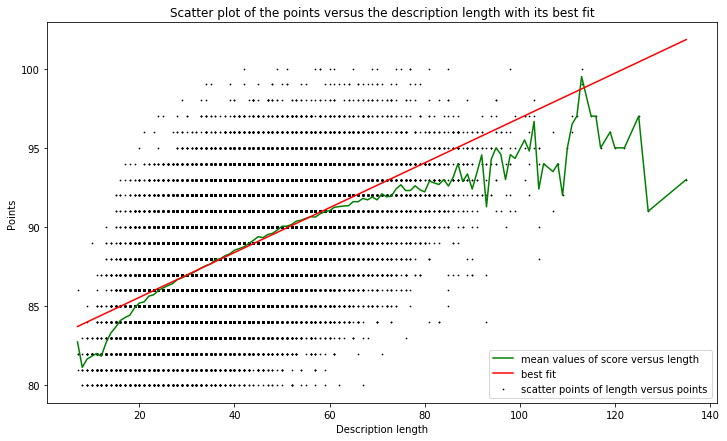

In [8]:
plt.figure(figsize=(12, 7))
title = 'Scatter plot of the points versus the description length with its best fit'

xs = clean_wine_data['description_length']
ys = clean_wine_data['points']

plt.scatter(xs, ys, 0.5, c='k', label='scatter points of length versus points')
plt.plot(length_means, c='g', label='mean values of score versus length')
plt.plot(np.unique(xs), np.poly1d(np.polyfit(xs, ys, 1))(np.unique(xs)), color='r', label='best fit')

plt.legend()
plt.xlabel('Description length')
plt.ylabel('Points')
plt.title(title)
plt.savefig('../figures/description_length_correlation/' + title)
plt.show()

The mean value of point seems to increase with the description length. But a higher amount of description length results in fluctation of the means since there is little data to work with. 

# Description length versus grouped points

Group the panda dataframe by points and calculate mean and standard deviation of every group.

In [9]:
points_means = clean_wine_data['description_length'].groupby(clean_wine_data['points']).mean()
points_stds = clean_wine_data['description_length'].groupby(clean_wine_data['points']).std()

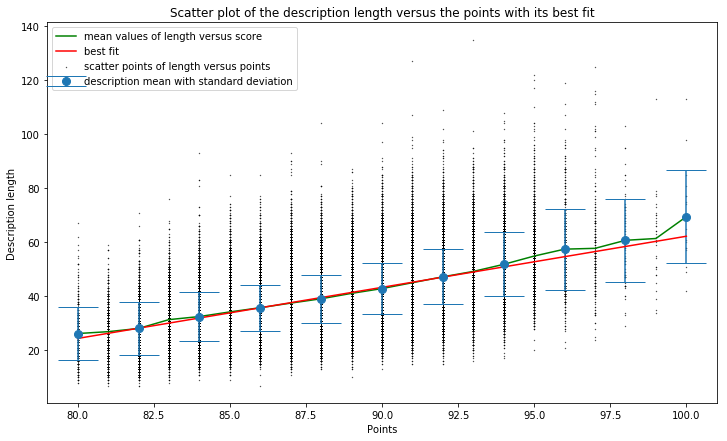

In [10]:
plt.figure(figsize=(12, 7))
title = 'Scatter plot of the description length versus the points with its best fit'

xs_points = points_stds.keys()[0::2]
ys_descr = points_means[0::2]
err = points_stds[0::2]

plt.scatter(ys, xs, 0.1, c='k', label='scatter points of length versus points')
plt.plot(points_means, c='g', label='mean values of length versus score')
plt.plot(np.unique(ys), np.poly1d(np.polyfit(ys, xs, 1))(np.unique(ys)), color='r', label='best fit')

(_, caps, _) = plt.errorbar(
    xs_points, ys_descr, yerr=err, fmt='o', markersize=8, capsize=20, label='description mean with standard deviation')
for cap in caps:
    cap.set_markeredgewidth(1)

plt.legend()
plt.xlabel('Points')
plt.ylabel('Description length')
plt.title(title)
plt.savefig('../figures/description_length_correlation/' + title)
plt.show()  

By flipping the axis and calculating the mean value of the description length versus the points, we can see that the mean line plot follows the best fit line.